In [2]:
from __future__ import division
from IPython.display import display, Math, Latex
from math import sin, cos
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, LinearLocator, NullFormatter, NullLocator, MultipleLocator
import matplotlib.ticker
import matplotlib.colors
from matplotlib.font_manager import FontProperties
from matplotlib import rc, text
import healpy as hp
from scipy.stats import norm
import scipy as sp

%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [3]:
c=2.99792458*(10**8)
G=6.67428*(10**(-11))
s_mass=G*(1.98892*10**(30))/(c**3)

# common function shortcuts
log10 = np.log10
pi = np.pi
sqrt = np.sqrt



In [4]:
# new binary pulsar candidate list
# J1744-1134
# J1843-1113
# J1939+2134

In [5]:
# pulasrs     (has binary params in par files, X is yes)
#J0437-4715      X
#J1012+5307      X
#J1024-0719      X
#J1732-5049      X  
#J1910+1256      X 
#J1955+2908      X

In [6]:
# Posterior PDF from Bailor-Jones et al.
wzp = -0.029 # defined in Bailor-Jones but computer in Lindegren et al. 2018

def pOfR(r, px, dpx, Lsph):
    """
    This is Equation 2 in Bailor-Jones et al. 2018.
    NB, r > 0
    """
    exponent = -r/Lsph - (px-wzp-1/r)**2/(2*dpx**2)
    ans = r**2*np.exp(exponent)
    return ans

In [7]:
# plotting preamble

fig_width_pt = 245.27 #513.17           # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height =fig_width*golden_mean       # height in inches
fig_size = [fig_width,fig_height]

params = {'backend': 'pdf',
        'axes.labelsize': 7,
        'lines.markersize': 2,
        'font.size': 7,
        'xtick.major.size':6,
        'xtick.minor.size':3,  
        'ytick.major.size':6,
        'ytick.minor.size':3, 
        'xtick.major.width':0.5,
        'ytick.major.width':0.5,
        'xtick.minor.width':0.5,
        'ytick.minor.width':0.5,
        'lines.markeredgewidth':1,
        'axes.linewidth':1.0,
        'legend.fontsize': 7,
        'xtick.labelsize': 7,
        'ytick.labelsize': 7,
        'savefig.dpi':200,
        'path.simplify':True,
        'font.family': 'serif',
        'font.serif':'Times',
        'text.latex.preamble': [r'\usepackage{amsmath}'],
        'text.usetex':True,
        #'axes.color_cycle': ['b', 'lime', 'r', 'purple', 'g', 'c', 'm', 'orange', 'darkblue', \
        #                        'darkcyan', 'y','orangered','chartreuse','brown','deeppink','lightgreen', 'k'],
        #'font.serif':cm,
        'figure.figsize': fig_size}
plt.rcParams.update(params)

# J0437-4715

In [8]:
# parallax distance measurement from VLBI observations
d_pi_PTA_0437 = 156.3 
eplus_pi_PTA_0437 = 1.3   # error on this
eminus_pi_PTA_0437 = 1.3   # error on this

# dispersion measure distance from NE 2001, https://www.nrl.navy.mil/rsd/RORF/ne2001/pulsar.cgi
d_DM_NE = 139
eplus_DM_NE = 33
eminus_DM_NE = 29

# YMW 16 DM model, http://www.atnf.csiro.au/research/pulsar/ymw16/
d_DM_YMW = 156.1 # no errors reported here...


In [9]:
x1 = d_pi_PTA_0437
dx1p = x1 + eplus_pi_PTA_0437
dx1m = x1 - eminus_pi_PTA_0437


In [10]:
# GAIA estimate placeholder
# 8.325	0.6777
gx_w = np.linspace(6, 11, 1000)
dist_gaia0437 = norm(8.325, 0.6777)

In [11]:
1/8.325

0.12012012012012013

In [12]:
# Corrected Bailer-Jones distance estimate
dist_BJ = np.linspace(.09, .16, 1000)
bj_0437 = []
for r in dist_BJ:
    bj_0437.append(pOfR(r,8.325,0.6777,0.432138759729853))


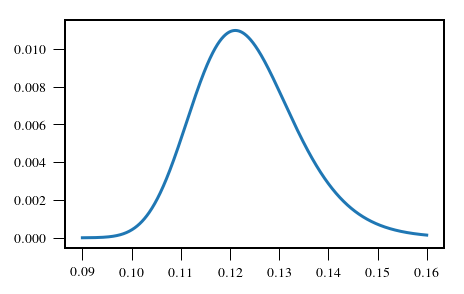

In [13]:
plt.plot(dist_BJ, np.array(bj_0437))

In [14]:
norm_0437 = sp.integrate.quad(pOfR, 0.09, .16, args=(8.325,0.6777,0.432138759729853))

In [15]:
#plt.plot(1/gx_w*1000, dist_gaia0437.pdf(gx_w), label = "GAIA", color = "C5", linestyle='dashed')

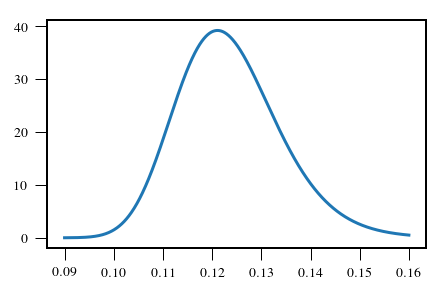

In [16]:
plt.plot(dist_BJ, np.array(bj_0437)/norm_0437[0])

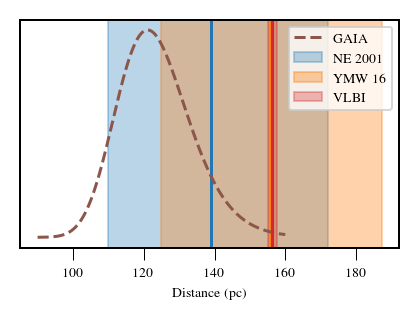

In [17]:
fig, ax1 = plt.subplots()

# DM NE 2001 model
ax1.axvspan(d_DM_NE - eminus_DM_NE, d_DM_NE+ eplus_DM_NE, alpha=0.3, color = "C0", label = "NE 2001")
plt.axvline(d_DM_NE, ymin=0, ymax=1, color = "C0")

# DM YMW16 model
ax1.axvspan(d_DM_YMW*.8, d_DM_YMW*1.2, alpha=0.35, color = "C1", label = "YMW 16")
plt.axvline(d_DM_YMW, ymin=0, ymax=1, color = "C1")

# GAIA distance, to be updated
#plt.plot(1/gx_w*1000, dist_gaia0437.pdf(gx_w), label = "GAIA", color = "C5", linestyle='dashed')
#plt.plot(dist_BJ, np.array(bj_0437)/norm[0])
plt.plot(dist_BJ*1000, np.array(bj_0437)/norm_0437[0], label = "GAIA", color = "C5", linestyle='dashed')

# VLBI measurements
ax1.axvspan(dx1p, dx1m, alpha=0.3, color = "C3", label = "VLBI")
plt.axvline(d_pi_PTA_0437, ymin=0, ymax=1, color = "C3")

ax1.set_yticklabels([])
plt.yticks([])
plt.xlabel("Distance (pc)")
plt.legend()
#plt.savefig("J0437_distances_wbj.pdf")

# J1012+5307

In [18]:
# dispersion measure distance from NE 2001, https://www.nrl.navy.mil/rsd/RORF/ne2001/pulsar.cgi
d_DM_NE_1012 = 411
eplus_DM_NE_1012 = 59
eminus_DM_NE_1012 = 56

# YMW 16 DM model, http://www.atnf.csiro.au/research/pulsar/ymw16/
d_DM_YMW_1012 = 804.5 # no errors reported here...

In [19]:
# parallax distance measurement from pulsar timing
#d_pi_PTA_1012 = 1150
#eplus_pi_PTA_1012 = 240   # error on this
#eminus_pi_PTA_1012 = 240   # error on this
px1012 = np.linspace(0.4, 1.5, 1000)
dist_px1012 = norm(0.91650432571114162888, 0.20031527835021703532 )

In [20]:
# GAIA estimate placeholder J1012
#1.3259	0.4142
gx1012 = np.linspace(0.5, 2.5, 1000)
dist_gaia1012 = norm(1.3259, 0.4142)

In [21]:
# Corrected Bailer-Jones distance estimate
# r_est	r_lo	r_hi
# 734.400211678976	549.321414392381	1064.06493890205
# Corrected Bailer-Jones distance estimate
dist_BJ_1012 = np.linspace(.4, 2.0, 1000)
bj_1012 = []
for r in dist_BJ_1012:
    bj_1012.append(pOfR(r,1.3259,0.4142,0.357583510161317))


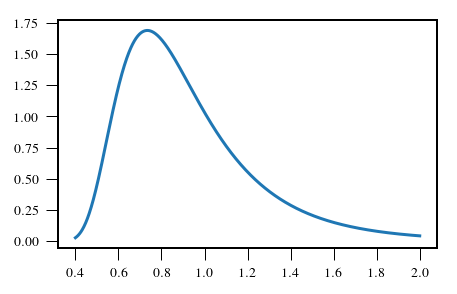

In [22]:
plt.plot(dist_BJ_1012, np.array(bj_1012)/0.0409490584600371)

In [23]:
norm_1012 = sp.integrate.quad(pOfR, 0.4, 2.0, args=(1.3259,0.4142,0.357583510161317))

In [24]:
norm_1012

(0.04094905846003715, 2.0080871615545925e-13)

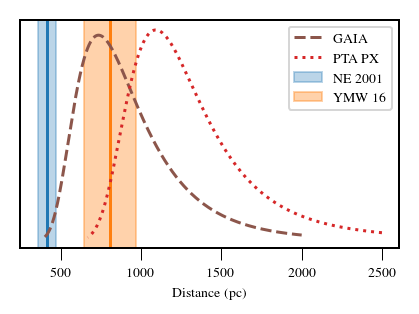

In [33]:
fig, ax1 = plt.subplots()

# DM NE 2001 model
ax1.axvspan(d_DM_NE_1012 - eminus_DM_NE_1012, d_DM_NE_1012+ eplus_DM_NE_1012, alpha=0.3, color = "C0", label = "NE 2001")
plt.axvline(d_DM_NE_1012, ymin=0, ymax=1, color = "C0")

# DM YMW16 model
ax1.axvspan(d_DM_YMW_1012*.8, d_DM_YMW_1012*1.2, alpha=0.35, color = "C1", label = "YMW 16")
plt.axvline(d_DM_YMW_1012, ymin=0, ymax=1, color = "C1")

# GAIA distance, to be updated
#plt.plot(1/gx1012*1000, dist_gaia1012.pdf(gx1012), label = "GAIA naive", color = "C5", linestyle='dashed')
plt.plot(dist_BJ_1012*1000, np.array(bj_1012)*1.15/norm_1012[0], label = "GAIA", color = "C5", linestyle='dashed')


# PX measurements
#ax1.axvspan(d_pi_PTA_1012 - eminus_pi_PTA_1012, d_pi_PTA_1012 + eplus_pi_PTA_1012, alpha=0.3, color = "C3", label = "VLBI")
#plt.axvline(d_pi_PTA_1012, ymin=0, ymax=1, color = "C3")
plt.plot(1/px1012*1000, dist_px1012.pdf(px1012), label = "PTA PX", color = "C3", linestyle='dotted')



ax1.set_yticklabels([])
plt.yticks([])
plt.xlabel("Distance (pc)")
plt.legend()
#plt.savefig("J1012_distances_wbj.pdf")

# J1024−0719

In [34]:
# parallax distance measurement
#d_pi_PTA_1024 = 1300
#eplus_pi_PTA_1024 = 600   # error on this
#eminus_pi_PTA_1024 = 300   # error on this

# dispersion measure distance from NE 2001, https://www.nrl.navy.mil/rsd/RORF/ne2001/pulsar.cgi
d_DM_NE_1024 = 386
eplus_DM_NE_1024 = 39
eminus_DM_NE_1024 = 38

# YMW 16 DM model, http://www.atnf.csiro.au/research/pulsar/ymw16/
d_DM_YMW_1024 = 382.3 # no errors reported here...

In [35]:
# GAIA estimate placeholder J1024
#0.5288	0.4259
gx1024 = np.linspace(0.3,1.6, 1000)
dist_gaia1024 = norm(0.5288, 0.4259)

In [36]:
# parallax distance measurement
# 0.85524949720672699275, 0.14638523179025333953
px1024 = np.linspace(0.4,1.6, 1000)
dist_px1024 = norm(0.85524949720672699275, 0.14638523179025333953)

In [37]:
# Corrected Bailer-Jones distance estimate, BIG DIFFERENCE HERE
# r_est	r_lo	r_hi, r_len = 425.767399303625, 0.5288, 0.4259
#1272.43244550383	874.816097347358	1954.594355484
# Corrected Bailer-Jones distance estimate
dist_BJ_1024 = np.linspace(.5, 3.1, 1000)
bj_1024 = []
for r in dist_BJ_1024:
    bj_1024.append(pOfR(r,0.5288, 0.4259,0.425767399303625))



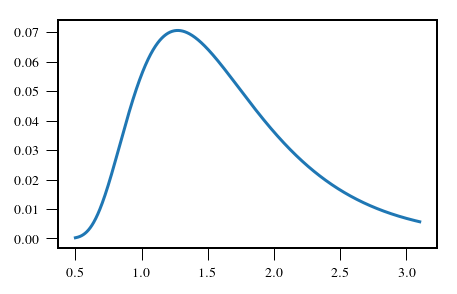

In [38]:
plt.plot(dist_BJ_1024, bj_1024)

In [39]:
norm_1024 = sp.integrate.quad(pOfR, .5, 3.1, args=(0.5288, 0.4259,0.425767399303625))

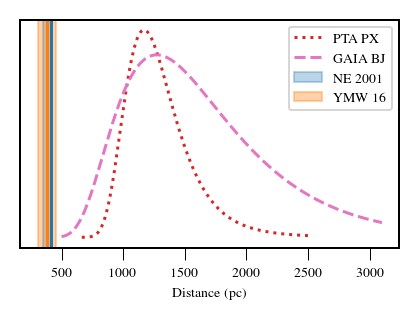

In [42]:
fig, ax1 = plt.subplots()

# DM NE 2001 model
ax1.axvspan(d_DM_NE_1024 - eminus_DM_NE_1024, d_DM_NE_1024+ eplus_DM_NE_1024, alpha=0.3, color = "C0", label = "NE 2001")
plt.axvline(d_DM_NE_1012, ymin=0, ymax=1, color = "C0")

# DM YMW16 model
ax1.axvspan(d_DM_YMW_1024*.8, d_DM_YMW_1024*1.2, alpha=0.35, color = "C1", label = "YMW 16")
plt.axvline(d_DM_YMW_1024, ymin=0, ymax=1, color = "C1")

# GAIA distance, to be updated
#plt.plot(1/gx1024*1000, dist_gaia1024.pdf(gx1024), label = "GAIA?", color = "C5", linestyle='dashed')

# PX measurements
#ax1.axvspan(d_pi_PTA_1024 - eminus_pi_PTA_1024, d_pi_PTA_1024 + eplus_pi_PTA_1024, alpha=0.3, color = "C3", label = "VLBI")
#plt.axvline(d_pi_PTA_1024, ymin=0, ymax=1, color = "C3")
plt.plot(1/px1024*1000, dist_px1024.pdf(px1024), label = "PTA PX", color = "C3", linestyle='dotted')

plt.plot(dist_BJ_1024*1000, np.array(bj_1024)*3/norm_1024[0], label = "GAIA BJ", color = "C6", linestyle='dashed')



ax1.set_yticklabels([])
plt.yticks([])
plt.xlabel("Distance (pc)")
plt.legend()
#plt.savefig("J1024_distances_wbj.pdf")

# J1804-2717

In [43]:
# dispersion measure distance from NE 2001, https://www.nrl.navy.mil/rsd/RORF/ne2001/pulsar.cgi
d_DM_NE_1804 = 776
eplus_DM_NE_1804 = 102
eminus_DM_NE_1804 = 108

# YMW 16 DM model, http://www.atnf.csiro.au/research/pulsar/ymw16/
d_DM_YMW_1804 = 800.5 # no errors reported here...

In [44]:
# GAIA estimate placeholder J1804
# 0.2395	0.2565

gx1804 = np.linspace(.1, .4, 1000)
dist_gaia1804 = norm(0.2395, 0.2565)

In [45]:
# Corrected Bailer-Jones distance estimate
dist_BJ_1804 = np.linspace(1.5, 9, 1000)
bj_1804 = []
for r in dist_BJ_1804:
    bj_1804.append(pOfR(r,0.2395, 0.2565,2.13108557645661))

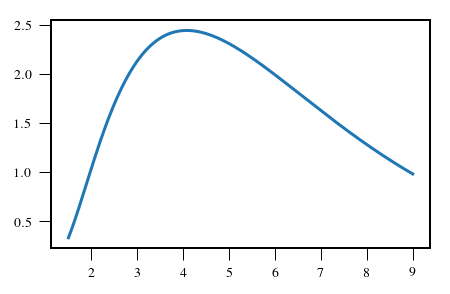

In [46]:
plt.plot(dist_BJ_1804, bj_1804)

In [47]:
norm_1804 = sp.integrate.quad(pOfR, 1.5, 9, args=(0.2395, 0.2565,2.13108557645661))

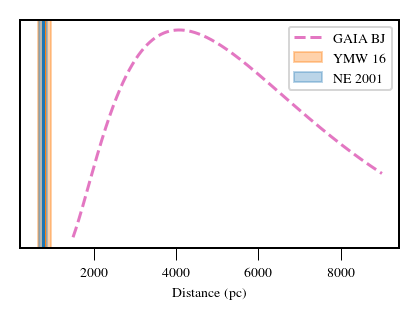

In [48]:
fig, ax1 = plt.subplots()

# DM YMW16 model
ax1.axvspan(d_DM_YMW_1804*.8, d_DM_YMW_1804*1.2, alpha=0.35, color = "C1", label = "YMW 16")
plt.axvline(d_DM_YMW_1804, ymin=0, ymax=1, color = "C1")

# DM NE 2001 model
ax1.axvspan(d_DM_NE_1804 - eminus_DM_NE_1804, d_DM_NE_1804+ eplus_DM_NE_1804, alpha=0.3, color = "C0", label = "NE 2001")
plt.axvline(d_DM_NE_1804, ymin=0, ymax=1, color = "C0")

# GAIA distance, to be updated
#plt.plot(1/gx1804*1000, dist_gaia1804.pdf(gx1804), label = "GAIA", color = "C5", linestyle='dashed')
plt.plot(dist_BJ_1804*1000, np.array(bj_1804)/norm_1804[0], label = "GAIA BJ", color = "C6", linestyle='dashed')



ax1.set_yticklabels([])
plt.yticks([])
plt.xlabel("Distance (pc)")
plt.legend()
#plt.savefig("J1804_distances_wbj.pdf")

# J1910+1256

In [49]:
# LK distance parallax distance measurement, Desvignes et al. 2016, Table 9.
d_pi_PTA_1910 = 550
eplus_pi_PTA_1910 = 460   # error on this
eminus_pi_PTA_1910 = 460   # error on this

# dispersion measure distance from NE 2001, https://www.nrl.navy.mil/rsd/RORF/ne2001/pulsar.cgi
d_DM_NE_1910 = 2327
eplus_DM_NE_1910 = 311
eminus_DM_NE_1910 = 317

# YMW 16 DM model, http://www.atnf.csiro.au/research/pulsar/ymw16/
d_DM_YMW_1910 = 1496.0  # no errors reported here...

In [50]:
# Corrected Bailer-Jones distance estimate, BIG DIFFERENCE HERE
# r_est	r_lo	r_hi, r_len = 1449.21521296784
#3365.90493298969	1735.68216116912	6062.47131778724
# Corrected Bailer-Jones distance estimate
dist_BJ_1910 = np.linspace(.4, 7, 1000)
bj_1910 = []
for r in dist_BJ_1910:
    bj_1910.append(pOfR(r,-0.4219, 0.7972,1.44921521296784))

In [51]:
#px1910_c = np.linspace(1000, 6000, 1000)
#dist_px1910_c = norm(3365.9, 1735.68)

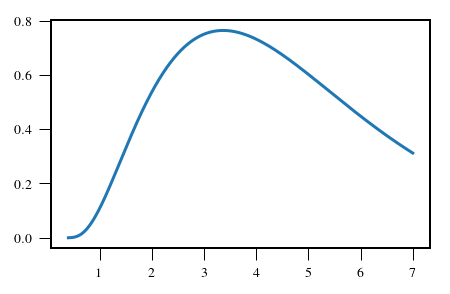

In [52]:
plt.plot(dist_BJ_1910, bj_1910) #negative parallax

In [53]:
norm_1910 = sp.integrate.quad(pOfR, 1.5, 6.5, args=(-0.4219, 0.7972,1.44921521296784))

In [69]:
# PTA LK-corrected PX measurement 
px1910 = np.linspace(50, 2000, 1000)
dist_px1910 = norm(550, 460)

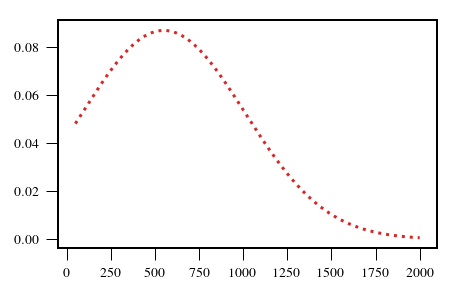

In [70]:
#plt.plot(px1910_c, dist_px1910_c.pdf(px1910_c), label = r"corrected Gaia$", color = "C4", linestyle='dashed')
plt.plot(px1910, dist_px1910.pdf(px1910)*100, label = r"PTA $D_\pi$", color = "C3", linestyle='dotted')

In [71]:
# GAIA estimate placeholder J1910
#THIS IS A NEGATIVE PARALLAX MU = -0.4219, SIGMA = 0.7972
#gx1910 = np.linspace(0.2, .8, 1000)
#dist_gaia1910 = norm(-0.4219, 0.7972)

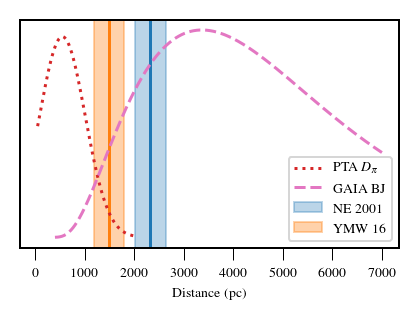

In [74]:
fig, ax1 = plt.subplots()

# DM NE 2001 model
ax1.axvspan(d_DM_NE_1910 - eminus_DM_NE_1910, d_DM_NE_1910 + eplus_DM_NE_1910, alpha=0.3, color = "C0", label = "NE 2001")
plt.axvline(d_DM_NE_1910, ymin=0, ymax=1, color = "C0")

# DM YMW16 model
ax1.axvspan(d_DM_YMW_1910*.8, d_DM_YMW_1910*1.2, alpha=0.35, color = "C1", label = "YMW 16")
plt.axvline(d_DM_YMW_1910, ymin=0, ymax=1, color = "C1")

# GAIA distance, to be updated
#plt.plot(px1910_c, dist_px1910_c.pdf(px1910_c), label = r"corrected Gaia", color = "C4", linestyle='dashed')


# LK-correcred PX measurements
plt.plot(px1910, dist_px1910.pdf(px1910)*280, label = r"PTA $D_\pi$", color = "C3", linestyle='dotted')
#ax1.axvspan(d_pi_PTA_1910 - eminus_pi_PTA_1910, d_pi_PTA_1910 + eplus_pi_PTA_1910, alpha=0.3, color = "C3", label = "VLBI")
#plt.axvline(d_pi_PTA_1910, ymin=0, ymax=1, color = "C3")
plt.plot(dist_BJ_1910*1000, np.array(bj_1910)/norm_1910[0], label = "GAIA BJ", color = "C6", linestyle='dashed')



ax1.set_yticklabels([])
plt.yticks([])
plt.xlabel("Distance (pc)")
plt.legend()
#plt.savefig("J1910_distances_wbj.pdf")

# J1955+2908

In [75]:
# dispersion measure distance from NE 2001, https://www.nrl.navy.mil/rsd/RORF/ne2001/pulsar.cgi
d_DM_NE_1955 = 4644
eplus_DM_NE_1955 = 577
eminus_DM_NE_1955 = 553

# YMW 16 DM model, http://www.atnf.csiro.au/research/pulsar/ymw16/
d_DM_YMW_1955 = 6306.2  # no errors reported here...

In [76]:
# GAIA estimate placeholder J1955
# 0.6034	0.1942
gx1955 = np.linspace(0.2,0.8, 1000)
dist_gaia1955 = norm(0.603, 0.1942)

In [89]:
# Corrected Bailer-Jones distance estimate
dist_BJ_1955 = np.linspace(1, 7, 1000)
bj_1955 = []
for r in dist_BJ_1955:
    bj_1955.append(pOfR(r,0.603, 0.1942,1.54924098114561))

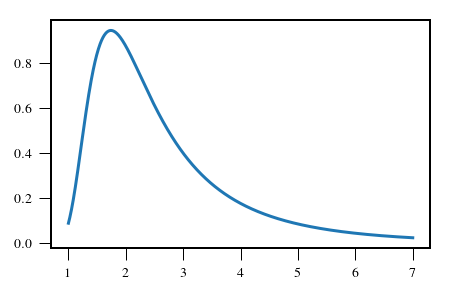

In [97]:
plt.plot(dist_BJ_1955, bj_1955) #negative parallax

In [90]:
norm_1955 = sp.integrate.quad(pOfR, 1.5, 6.5, args=(0.603, 0.1942,1.54924098114561 ))

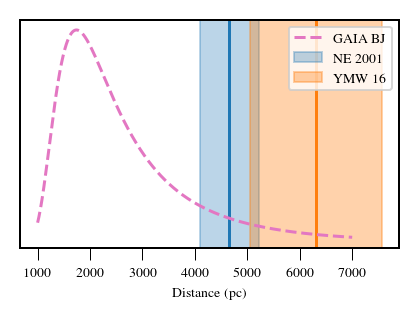

In [92]:
fig, ax1 = plt.subplots()

# DM NE 2001 model
ax1.axvspan(d_DM_NE_1955 - eminus_DM_NE_1955, d_DM_NE_1955 + eplus_DM_NE_1955, alpha=0.3, color = "C0", label = "NE 2001")
plt.axvline(d_DM_NE_1955, ymin=0, ymax=1, color = "C0")

# DM YMW16 model
ax1.axvspan(d_DM_YMW_1955*.8, d_DM_YMW_1955*1.2, alpha=0.35, color = "C1", label = "YMW 16")
plt.axvline(d_DM_YMW_1955, ymin=0, ymax=1, color = "C1")

# GAIA distance, to be updated
#plt.plot(1/gx1955*1000, dist_gaia1955.pdf(gx1955), label = "GAIA", color = "C5", linestyle='dashed')
plt.plot(dist_BJ_1955*1000, np.array(bj_1955)*3/norm_1955[0], label = "GAIA BJ", color = "C6", linestyle='dashed')



ax1.set_yticklabels([])
plt.yticks([])
plt.xlabel("Distance (pc)")
plt.legend()
#plt.savefig("J1955_distances_wbj.pdf")

# J1732-5049

In [93]:
# dispersion measure distance from NE 2001, https://www.nrl.navy.mil/rsd/RORF/ne2001/pulsar.cgi
d_DM_NE_1732 = 1411
eplus_DM_NE_1732 = 206
eminus_DM_NE_1732 = 198

# YMW 16 DM model, http://www.atnf.csiro.au/research/pulsar/ymw16/
d_DM_YMW_1732 = 1875.0   # no errors reported here...

In [94]:
# GAIA estimate placeholder J1955
# NB negative parallax -1.1837	2.8444
gx1732 = np.linspace(.17, 1.5, 1000)
dist_gaia1732 = norm(-1.1837, 2.8444)

In [103]:
# Corrected Bailer-Jones distance estimate
dist_BJ_1732 = np.linspace(.1, 10, 1000)
bj_1732 = []
for r in dist_BJ_1732:
    bj_1732.append(pOfR(r,-1.1837, 2.8444,1.94743888544794))

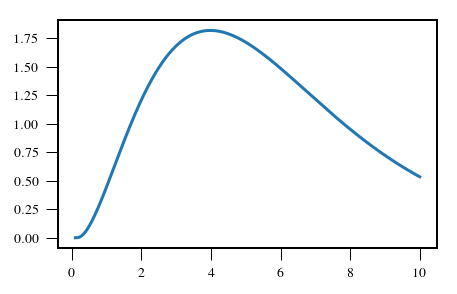

In [104]:
plt.plot(dist_BJ_1732, bj_1732) # look out, negative parallax

In [105]:
norm_1732 = sp.integrate.quad(pOfR, 1.5, 10, args=(-1.1837, 2.8444,1.94743888544794))

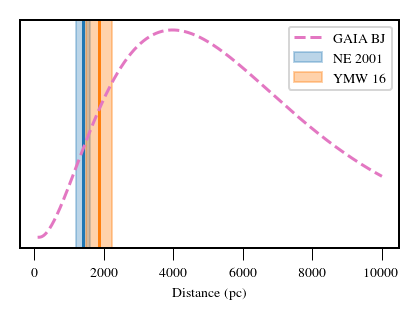

In [106]:
fig, ax1 = plt.subplots()

# DM NE 2001 model
ax1.axvspan(d_DM_NE_1732 - eminus_DM_NE_1732, d_DM_NE_1732 + eplus_DM_NE_1732, alpha=0.3, color = "C0", label = "NE 2001")
plt.axvline(d_DM_NE_1732, ymin=0, ymax=1, color = "C0")

# DM YMW16 model
ax1.axvspan(d_DM_YMW_1732*.8, d_DM_YMW_1732*1.2, alpha=0.35, color = "C1", label = "YMW 16")
plt.axvline(d_DM_YMW_1732, ymin=0, ymax=1, color = "C1")

# GAIA distance, to be updated
#plt.plot(1/gx1732*1000, dist_gaia1732.pdf(gx1732), label = "GAIA", color = "C5", linestyle='dashed')
plt.plot(dist_BJ_1732*1000, np.array(bj_1732)/norm_1732[0], label = "GAIA BJ", color = "C6", linestyle='dashed')



ax1.set_yticklabels([])
plt.yticks([])
plt.xlabel("Distance (pc)")
plt.legend()
#plt.savefig("J1732_distances_wbj.pdf")

In [ ]:
MGlist = [15.0112952108918, 3.56911521202147, 10.2381408530516, 7.79997723238792, 
          11.4246459729484, 9.28347772655008, 7.61507452919485]
bprp = [1.548225, 1.106436, 0.274221, 1.834633, 1.530455, 1.691048, 2.919764]

In [ ]:
plt.scatter(bprp, MGlist)
plt.ylim(16, 0)
plt.show()

# J1744-1134

In [107]:
# dispersion measure distance from NE 2001, https://www.nrl.navy.mil/rsd/RORF/ne2001/pulsar.cgi
# DM = 3.13590
# l = 14.7939, b = 9.1795

d_DM_NE_1744 = 414
eplus_DM_NE_1744 = 17
eminus_DM_NE_1744 = 16

# YMW 16 DM model, http://www.atnf.csiro.au/research/pulsar/ymw16/
d_DM_YMW_1744 = 148.1   # no errors reported here...

In [108]:
#PX from par file
px1744 = np.linspace(2.0, 3.0, 1000)
dist_px1744 = norm(2.4666340693407614979, 0.07324684023396225985)


In [109]:
#GAIA 
# mu = 1.3528, sigma = 1.3632
gx1744 = np.linspace(0.1, 2, 1000)
dist_gaia1744 = norm(1.3528, 1.3632)

(0, 800)

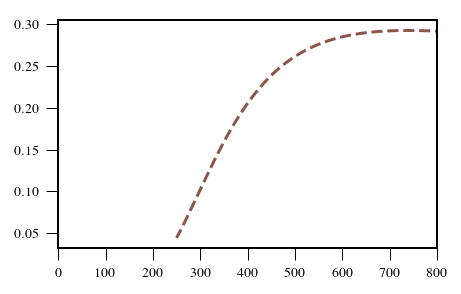

In [110]:
gx1744 = np.linspace(0.01, 4, 1000)
dist_gaia1744 = norm(1.3528, 1.3632)
plt.plot(1/gx1744*1000, dist_gaia1744.pdf(gx1744), label = "GAIA", color = "C5", linestyle='dashed')
plt.xlim(0,800)

In [138]:
# Corrected Bailer-Jones distance estimate
#1.3528	1.3632
dist_BJ_1744 = np.linspace(.1, 6, 1000)
bj_1744 = []
for r in dist_BJ_1744:
    bj_1744.append(pOfR(r,1.3528, 1.3632,1.75210341268605))

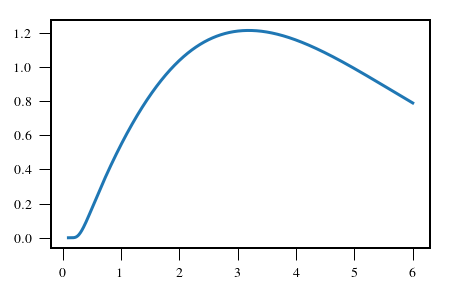

In [139]:
plt.plot(dist_BJ_1744, bj_1744) # look out, negative parallax

In [140]:
norm_1744 = sp.integrate.quad(pOfR, .1, 6, args=(1.3528, 1.3632,1.75210341268605))

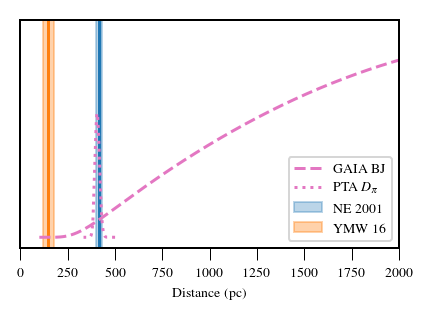

In [141]:
fig, ax1 = plt.subplots()

# DM NE 2001 model
ax1.axvspan(d_DM_NE_1744 - eminus_DM_NE_1744, d_DM_NE_1744 + eplus_DM_NE_1744, alpha=0.3, color = "C0", label = "NE 2001")
plt.axvline(d_DM_NE_1744, ymin=0, ymax=1, color = "C0")

# DM YMW16 model
ax1.axvspan(d_DM_YMW_1744*.8, d_DM_YMW_1744*1.2, alpha=0.35, color = "C1", label = "YMW 16")
plt.axvline(d_DM_YMW_1744, ymin=0, ymax=1, color = "C1")

# GAIA distance
#plt.plot(1/gx1744*1000, dist_gaia1744.pdf(gx1744), label = "GAIA", color = "C5", linestyle='dashed')
plt.plot(dist_BJ_1744*1000, np.array(bj_1744)*40/norm_1744[0], label = "GAIA BJ", color = "C6", linestyle='dashed')


# PX from par file
plt.plot(1/px1744*1000, dist_px1744.pdf(px1744), label = r"PTA $D_\pi$", color = "C6", linestyle='dotted')

ax1.set_yticklabels([])
plt.yticks([])
plt.xlim(0,2000)
plt.xlabel("Distance (pc)")
plt.legend()
plt.savefig("J1744_distances_wbj.pdf")

In [ ]:
1000/0.3961 #star in line of sight to 0613

In [ ]:
1000/1.1163892630643213735 #pulsar 0613